<a href="https://colab.research.google.com/github/hitallocavas/covid-19-data-analysis/blob/main/covid_19_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise Covid 19

*   Hitallo Cavalcanti
*   Leandro Moura




##Inicializando

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 15]

In [351]:
country_profile_variables=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/country_profile_variables.csv",encoding = "ISO-8859-1")
kiva_country_profile_variables=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/kiva_country_profile_variables.csv",encoding = "ISO-8859-1")
country_vaccinations=pd.read_csv("https://raw.githubusercontent.com/hitallocavas/covid-19-data-analysis/main/country_vaccinations.csv",encoding = "ISO-8859-1")

##Conhecendo os dados

###Conhecendo as colunas

country_profile_variables.columns #as é igual à kiva_country_profile_variables. 

In [352]:
country_profile_variables.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, curren

In [353]:
country_vaccinations.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

###Imprimindo os dados

In [354]:
country_vaccinations

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,Zimbabwe,ZWE,2021-02-25,11007.0,11007.0,NaN,3135.0,1572.0,0.07,0.07,NaN,106.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4674,Zimbabwe,ZWE,2021-02-26,12579.0,12579.0,NaN,1572.0,1750.0,0.08,0.08,NaN,118.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4675,Zimbabwe,ZWE,2021-02-27,15705.0,15705.0,NaN,3126.0,2150.0,0.11,0.11,NaN,145.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...
4676,Zimbabwe,ZWE,2021-02-28,18843.0,18843.0,NaN,3138.0,2551.0,0.13,0.13,NaN,172.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1366477055...


In [355]:
country_profile_variables

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,37.3,50.5,10.8,34.5,54.7,11.4,17.0/70.7,160,161,29992,47091,-17099,-27229,2.0,70.7,2.8,3.0,76.5/74.1,29.3/9.4,242.4/0.6,99.8,27.7,7.2,...,...,112.7/119.5,101.7/98.1,45.1/28.9,31.6,113.0,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,-99.0,-99.0,...,...,...,...,.../...,112,112,-99,-99,-99,-99,-~0.0,87.2,-0.1,2.6,77.8/71.1,33.3/9.0,23.2/41.8,-99,9.6,-99.0,-99,-99,-99,-99,-99,-99.0,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,10.8,88.6,-99,-99,-99,-99,-99,-99,-99,100,1355,-1255,-99,-1.6,85.1,0.1,1.2,-99,14.4/19.0,42.1/59.7,-99,-99,8.1,3.7,3.3,-99,-99,-99,32.1,88.1,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,-99,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,-99,-99,115,115,1,53,-51,-99,-2.1,0.0,0.0,2.1,78.7/72.8,25.5/15.4,2.8/21.7,-99,...,-99.0,-99,-99,-99,-99,-99

In [356]:
kiva_country_profile_variables

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3.0,3489.1,19.0,28.3,52.8,35.0,15.7,49.3,16.6,55.3/74.2,135,135,1776,3230,-1455,-279,0.3,62.7,-0.1,1.6,77.0/70.6,20.0/16.9,191.2/6.3,19.3,13.2,4.5,2.8,2.8,98.5/98.5,89.0/88.1,46.9/41.6,9.9,115.2,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99
3,Azerbaijan,WesternAsia,86600,9828,118.9,99.3,53049,0.7,5438.7,6.7,49.9,43.4,36.7,14.2,49.1,5.2,62.0/68.8,131,136,9143,8532,611,-222,1.3,54.6,1.6,2.1,74.6/68.6,23.3/10.1,264.2/2.7,623.3,31.4,6.0,3.4,2.6,105.6/107.4,-99,27.5/23.6,16.8,111.3,77.0,97,13.5,37.5/3.9,2459,61,94.7/77.8,91.6/86.6,0.14,-99
4,Belize,CentralAmerica,22966,375,16.4,99.2,1721,1.2,4789.4,14.6,18.5,66.9,16.1,15.9,67.9,11.5,56.7/83.8,97,97,246,952,-706,-175,2.2,44.0,1.9,2.6,72.7/67.2,31.4/6.2,53.9/15.0,3.1,14.3,5.8,...,6.4,110.4/115.8,81.8/79.8,28.7/17.9,9.4,48.9,41.6,117,60.1,0.5/1.4,9,36,98.9/100.0,93.5/88.2,1.68,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Vietnam,South-easternAsia,330967,95541,308.1,98.0,193241,6.7,2067.9,18.9,37.0,44.2,41.8,22.9,35.2,2.2,73.9/83.3,136,134,176632,174111,2520,906,1.1,33.6,3.0,2.0,8

### Não há NAs em (kiva_)country_profile_variables, mas...

In [357]:
country_profile_variables.isna().drop_duplicates()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [358]:
kiva_country_profile_variables.isna().drop_duplicates()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


>Verificando se o -99 faz papel de NA através da moda.

In [359]:
columns_dict = {}
i = 0
for name in country_profile_variables.columns:
  columns_dict[name] = i
  columns_dict[i] = name
  i+=1

columns_dict

{0: 'country',
 1: 'Region',
 10: 'Economy: Industry (% of GVA)',
 11: 'Economy: Services and other activity (% of GVA)',
 12: 'Employment: Agriculture (% of employed)',
 13: 'Employment: Industry (% of employed)',
 14: 'Employment: Services (% of employed)',
 15: 'Unemployment (% of labour force)',
 16: 'Labour force participation (female/male pop. %)',
 17: 'Agricultural production index (2004-2006=100)',
 18: 'Food production index (2004-2006=100)',
 19: 'International trade: Exports (million US$)',
 2: 'Surface area (km2)',
 20: 'International trade: Imports (million US$)',
 21: 'International trade: Balance (million US$)',
 22: 'Balance of payments, current account (million US$)',
 23: 'Population growth rate (average annual %)',
 24: 'Urban population (% of total population)',
 25: 'Urban population growth rate (average annual %)',
 26: 'Fertility rate, total (live births per woman)',
 27: 'Life expectancy at birth (females/males, years)',
 28: 'Population age distribution (0-14 

In [360]:
country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)

In [361]:
country_profile_variables.drop(columns=[0, 3, 29]).mode()

,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,Caribbean,-99,4.0,100.2,-99.0,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,...,.../...,-99.0,-99.0,-99,-99,-99,-99,1.2,100.0,0.1,1.5,-99,.../...,-99,-99,-99.0,...,-99,-99,-99,-99,-99.0,-99,-99,49,-99,-99,0.0,-99.0,100.0/100.0,-99,-99,-99.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)
kiva_country_profile_variables

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,23.3,53.3,61.6,10.0,28.5,8.6,19.3/83.6,125,125,1458,3568,-2110,-5121,3.2,26.7,4.0,5.3,63.5/61.0,43.2/4.1,382.4/1.2,1513.1,68.6,8.2,0.3,3.3,91.1/131.6,39.7/70.7,3.7/13.3,27.7,61.6,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,26.0,51.7,41.4,18.3,40.3,15.8,40.2/61.0,134,134,1962,4669,-2707,-1222,-0.1,57.4,2.2,1.7,79.9/75.6,17.4/19.0,57.6/2.0,8.8,14.6,5.9,1.3,3.5,111.7/115.5,92.5/98.8,68.1/48.7,22.9,106.4,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Armenia,WesternAsia,29743,2930,102.9,88.8,10529,3.0,3489.1,19.0,28.3,52.8,35.0,15.7,49.3,16.6,55.3/74.2,135,135,1776,3230,-1455,-279,0.3,62.7,-0.1,1.6,77.0/70.6,20.0/16.9,191.2/6.3,19.3,13.2,4.5,2.8,2.8,98.5/98.5,89.0/88.1,46.9/41.6,9.9,115.2,58.2,114,11.7,5.5/1.8,48,46,100.0/100.0,96.2/78.2,3.17,-99
3,Azerbaijan,WesternAsia,86600,9828,118.9,99.3,53049,0.7,5438.7,6.7,49.9,43.4,36.7,14.2,49.1,5.2,62.0/68.8,131,136,9143,8532,611,-222,1.3,54.6,1.6,2.1,74.6/68.6,23.3/10.1,264.2/2.7,623.3,31.4,6.0,3.4,2.6,105.6/107.4,-99,27.5/23.6,16.8,111.3,77.0,97,13.5,37.5/3.9,2459,61,94.7/77.8,91.6/86.6,0.14,-99
4,Belize,CentralAmerica,22966,375,16.4,99.2,1721,1.2,4789.4,14.6,18.5,66.9,16.1,15.9,67.9,11.5,56.7/83.8,97,97,246,952,-706,-175,2.2,44.0,1.9,2.6,72.7/67.2,31.4/6.2,53.9/15.0,3.1,14.3,5.8,...,6.4,110.4/115.8,81.8/79.8,28.7/17.9,9.4,48.9,41.6,117,60.1,0.5/1.4,9,36,98.9/100.0,93.5/88.2,1.68,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Vietnam,South-easternAsia,330967,95541,308.1,98.0,193241,6.7,2067.9,18.9,37.0,44.2,41.8,22.9,35.2,2.2,73.9/83.3,136,134,176632,174111,2520,906,1.1,33.6,3.0,2.0,80.3/70.7,23.1/11.1,72.8/0.1,11.0,19.3,7.1,1.2,5.7,108.4/109.3,-99,28.9/28.8,26.7,130.6,52.7,616,47.2,166.9/1.8,2977,30,99.1/96.9,94.4/69.7,1.73,-99
82,Virgin Islands,Caribbean,347,105,299.7,91.1,-99,-99,-99.0,-99.0,-99.0,-99.0,10.9,24.0,65.2,9.0,52.5/70.7,109,109,-99,-99,-99,-99,-0.2,95.3,0.3,2.3,81.5/76.7,20.1/25.3,56.7/53.4,-99,9.3,-99.0,-99,-99,-99,-99,-99,-99.0,...,54.8,58,50.6,-99,-99,-99,100.0/100.0,96.4/96.4,-99.00,-99
83,Yemen,WesternAsia,527968,28250,53.5,102.1,29688,-28.1,1106.4,14.7,36.9,48.4,32.9,17.9,49.2,16.1,26.2/73.7,136,137,570,6861,-6291,-3026,2.6,34.6,4.0,4.4,65.6/62.8,39.9/4.6,344.1/1.3,3371.4,47.2,5.6,0.3,...,88.9/105.7,39.5/57.4,6.1/13.7,0.0,68.0,25.1,298,1.0,22.7/0.9,668,12,72.0/46.5,92.5/34.1,2.99,-99
84,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255,2.9,1311.1,8.2,32.3,59.5,54.8,9.9,35.3,7.4,69.9/80.9,179,180,6505,7442,-937,-768,3.0,40.9,4.3,5.2,61.9/57.5,44.8/3.7,127.9/0.8,55.3,53.8,5.0,0.2,...,104.0/103.3,-99,3.4/4.5,18.0,74.5,21.0,88,65.6,4.5/0.3,374,26,85.6/51.3,55.6/35.7,3.96,-99


In [363]:
kiva_country_profile_variables.drop(columns=[0, 2, 4, 16, 29]).mode()

,1,3,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,EasternAfrica,2930.0,99.5,-99.0,2.8,-99.0,19.0,28.3,37.4,2.0,4.8,40.3,2.4,111.0,122.0,-99.0,-99.0,-99.0,-99,1.6,38.6,3.0,2.6,74.9/70.7,29.0/8.4,~0.0,46.5,-99.0,...,...,-99,.../...,.../...,-99.0,87.1,18.0,31.0,8.1,-99,31.0,12.0,100.0/100.0,100.0/100.0,-99.0,-99.0
1,NaN,NaN,NaN,NaN,7.0,1106.4,NaN,NaN,NaN,19.6,8.7,NaN,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.9,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.../...,NaN,NaN,NaN,NaN,19.0,42.0,50.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,14.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,58.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.9,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.4,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [364]:
kiva_country_profile_variables.columns = kiva_country_profile_variables.columns.map(columns_dict)
country_profile_variables.columns = country_profile_variables.columns.map(columns_dict)

>Percebe-se que o -99 aparece com frequência em algumas colunas da tabela. Na country_profile_variables, observa-se, por exemplo, nas colunas de 6 a 14, já em kiva_country_profile_variables em 19 a 22. Há outros valores que são recorrentes e parecem não informar valor, como na coluna 34 ou 36 do kiva_country onde aparecem, respectivamente, "..." e ".../...". A verificar se faz sentindo, nestas colunas, o valor -99.

In [365]:
columns_dict[6]

'GDP: Gross domestic product (million current US$)'

In [366]:
columns_dict[7]

'GDP growth rate (annual %, const. 2005 prices)'

In [367]:
columns_dict[8]

'GDP per capita (current US$)'

In [368]:
columns_dict[19]

'International trade: Exports (million US$)'

In [369]:
columns_dict[20]

'International trade: Imports (million US$)'

In [370]:
columns_dict[21]

'International trade: Balance (million US$)'

####Conclusão
>Estes diferentes contextos indicam que as colunas reference-se a características econômicas e demográficas. Assim, por conhecimento do domínio, assume-se que é desprezível a chance da moda, ao acaso, ser -99, além deste valor ser irreal para o contexto do domínio. Desta forma, concluí-se que -99 e afins("..." e ".../...") estão fazendo o papel de NAs nestes conjunto de dados.

##Tratando os dados:

####Explorando

In [371]:
country_vaccinations[country_vaccinations["iso_code"] == "BRA"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
552,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
553,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.00,0.00,NaN,1.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
554,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.00,0.00,NaN,3.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
555,Brazil,BRA,2021-01-19,11470.0,11470.0,NaN,10361.0,3823.0,0.01,0.01,NaN,18.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
556,Brazil,BRA,2021-01-20,28543.0,28543.0,NaN,17073.0,7136.0,0.01,0.01,NaN,34.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
557,Brazil,BRA,2021-01-21,136519.0,136519.0,NaN,107976.0,27304.0,0.06,0.06,NaN,128.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
558,Brazil,BRA,2021-01-22,245877.0,245877.0,NaN,109358.0,40980.0,0.12,0.12,NaN,193.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
559,Brazil,BRA,2021-01-23,537774.0,537774.0,NaN,291897.0,76825.0,0.25,0.25,NaN,361.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
560,Brazil,BRA,2021-01-24,604722.0,604722.0,NaN,66948.0,86373.0,0.28,0.28,NaN,406.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
561,Brazil,BRA,2021-01-25,700608.0,700608.0,NaN,95886.0,99928.0,0.33,0.33,NaN,470.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/


In [372]:
country_vaccinations[country_vaccinations["iso_code"] == "USA"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4508,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4509,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4510,United States,USA,2020-12-22,NaN,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4511,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4512,United States,USA,2020-12-24,NaN,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4513,United States,USA,2020-12-25,NaN,NaN,NaN,NaN,215238.0,NaN,NaN,NaN,644.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4514,United States,USA,2020-12-26,1944585.0,1944585.0,NaN,NaN,231396.0,0.58,0.58,NaN,692.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4515,United States,USA,2020-12-27,NaN,NaN,NaN,NaN,211379.0,NaN,NaN,NaN,632.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4516,United States,USA,2020-12-28,2127143.0,2127143.0,NaN,NaN,216147.0,0.64,0.64,NaN,646.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4517,United States,USA,2020-12-29,NaN,NaN,NaN,NaN,235685.0,NaN,NaN,NaN,705.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [373]:
pd.set_option('display.max_rows', None)
country_vaccinations.groupby("iso_code").last()["country"]
#Lembrar-se de resetar display.max_rows

iso_code
AIA                         Anguilla
ALB                          Albania
AND                          Andorra
ARE             United Arab Emirates
ARG                        Argentina
AUS                        Australia
AUT                          Austria
AZE                       Azerbaijan
BEL                          Belgium
BGD                       Bangladesh
BGR                         Bulgaria
BHR                          Bahrain
BLR                          Belarus
BMU                          Bermuda
BOL                          Bolivia
BRA                           Brazil
BRB                         Barbados
CAN                           Canada
CHE                      Switzerland
CHL                            Chile
CHN                            China
COL                         Colombia
CRI                       Costa Rica
CYM                   Cayman Islands
CYP                           Cyprus
CZE                          Czechia
DEU                          

In [374]:
pd.reset_option("max_rows")

In [375]:
country_vaccinations[country_vaccinations["iso_code"] == "ALB"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [376]:
country_vaccinations[country_vaccinations["iso_code"] == "CHN"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
860,China,CHN,2020-12-15,1500000.0,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
861,China,CHN,2020-12-16,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
862,China,CHN,2020-12-17,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
863,China,CHN,2020-12-18,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
864,China,CHN,2020-12-19,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
865,China,CHN,2020-12-20,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
866,China,CHN,2020-12-21,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
867,China,CHN,2020-12-22,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
868,China,CHN,2020-12-23,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
869,China,CHN,2020-12-24,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...


In [377]:
country_vaccinations[country_vaccinations["iso_code"] == "IND"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1974,India,IND,2021-01-15,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1975,India,IND,2021-01-16,191181.0,191181.0,NaN,191181.0,191181.0,0.01,0.01,NaN,139.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1976,India,IND,2021-01-17,224301.0,224301.0,NaN,33120.0,112150.0,0.02,0.02,NaN,81.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1977,India,IND,2021-01-18,454049.0,454049.0,NaN,229748.0,151350.0,0.03,0.03,NaN,110.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1978,India,IND,2021-01-19,674835.0,674835.0,NaN,220786.0,168709.0,0.05,0.05,NaN,122.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1979,India,IND,2021-01-20,806484.0,806484.0,NaN,131649.0,161297.0,0.06,0.06,NaN,117.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1980,India,IND,2021-01-21,1043534.0,1043534.0,NaN,237050.0,173922.0,0.08,0.08,NaN,126.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1981,India,IND,2021-01-22,1390592.0,1390592.0,NaN,347058.0,198656.0,0.10,0.10,NaN,144.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1982,India,IND,2021-01-23,1582201.0,1582201.0,NaN,191609.0,198717.0,0.11,0.11,NaN,144.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...
1983,India,IND,2021-01-24,1615504.0,1615504.0,NaN,33303.0,198743.0,0.12,0.12,NaN,144.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,https://www.mohfw.gov.in/pdf/CumulativeCovidVa...


In [378]:
country_vaccinations[country_vaccinations["iso_code"] == "RUS"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3603,Russia,RUS,2020-12-15,28500.0,28500.0,NaN,NaN,NaN,0.02,0.02,NaN,NaN,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3604,Russia,RUS,2020-12-16,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3605,Russia,RUS,2020-12-17,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3606,Russia,RUS,2020-12-18,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3607,Russia,RUS,2020-12-19,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3608,Russia,RUS,2020-12-20,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3609,Russia,RUS,2020-12-21,NaN,NaN,NaN,NaN,3357.0,NaN,NaN,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3610,Russia,RUS,2020-12-22,52000.0,52000.0,NaN,NaN,3357.0,0.04,0.04,NaN,23.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3611,Russia,RUS,2020-12-23,NaN,NaN,NaN,NaN,12592.0,NaN,NaN,NaN,86.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats
3612,Russia,RUS,2020-12-24,NaN,NaN,NaN,NaN,21827.0,NaN,NaN,NaN,150.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats


In [379]:
country_vaccinations[country_vaccinations["iso_code"] == "AUT"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
189,Austria,AUT,2021-01-10,NaN,6784.0,NaN,NaN,NaN,NaN,0.08,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
190,Austria,AUT,2021-01-11,NaN,11559.0,NaN,NaN,NaN,NaN,0.13,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
191,Austria,AUT,2021-01-12,NaN,13172.0,NaN,NaN,NaN,NaN,0.15,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
192,Austria,AUT,2021-01-13,21259.0,20064.0,NaN,NaN,NaN,0.24,0.22,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
193,Austria,AUT,2021-01-14,47087.0,29359.0,NaN,25828.0,6457.0,0.52,0.33,NaN,717.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
194,Austria,AUT,2021-01-15,67473.0,39751.0,NaN,20386.0,9243.0,0.75,0.44,NaN,1026.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
195,Austria,AUT,2021-01-16,76066.0,50402.0,NaN,8593.0,9134.0,0.84,0.56,NaN,1014.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
196,Austria,AUT,2021-01-17,82005.0,55450.0,NaN,5939.0,8678.0,0.91,0.62,NaN,964.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
197,Austria,AUT,2021-01-18,88973.0,60708.0,304.0,6968.0,9673.0,0.99,0.67,0.00,1074.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
198,Austria,AUT,2021-01-19,97389.0,70474.0,1034.0,8416.0,10876.0,1.08,0.78,0.01,1208.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...


###Lidando com NAs de total_vaccinations
>total de vacinas é cumulativo. Desta forma, é possível trocar os NAs que estiverem entre duas linhas preenchidas na coluna total_vaccinations pela interpolação das mesmas. A interpolação será linear porque assume-se que a capacidade de vacinação diaria dos países não crescem de maneira significativa de um dia para o outro, a menos que ocorra algum evento, como a chegada de uma nova remersa de vacinas.

>É preciso, no entanto, cuidar para os casos em que o primeiro dia é NA, pois isto resultará numa interpolação errônea. Para tanto, substituirei todos os NAs dos primeiros dias por 0.

In [380]:
country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
189,Austria,AUT,2021-01-10,NaN,6784.0,NaN,NaN,NaN,NaN,0.08,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
677,Canada,CAN,2020-12-19,NaN,8734.0,NaN,NaN,NaN,NaN,0.02,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Canada,https://health-infobase.canada.ca/covid-19/vac...
2475,Latvia,LVA,2020-12-28,NaN,595.0,NaN,NaN,NaN,NaN,0.03,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...


>Como pode ser observado, há três casos em que a interpolação iria apresentar um resultado diferente do esperado. Isto porque espera-se que o primeiro dia seja zero, e nestes casos, o primeiro dia seria a interpolação do primerio número válido anterior à linha e do próximo número válido. Assim, ao setar estes números para zero, espera-se resolver este problema.

In [381]:
for row in country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()].loc[:,"total_vaccinations"].index:
  country_vaccinations.loc[rows_na, "total_vaccinations"] = 0

country_vaccinations.groupby('iso_code').head(1)[country_vaccinations.groupby('iso_code').head(1)["total_vaccinations"].isna()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
189,Austria,AUT,2021-01-10,NaN,6784.0,NaN,NaN,NaN,NaN,0.08,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
677,Canada,CAN,2020-12-19,NaN,8734.0,NaN,NaN,NaN,NaN,0.02,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Canada,https://health-infobase.canada.ca/covid-19/vac...
2475,Latvia,LVA,2020-12-28,NaN,595.0,NaN,NaN,NaN,NaN,0.03,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",National Health Service,https://data.gov.lv/dati/eng/dataset/covid19-v...


In [382]:
country_vaccinations["total_vaccinations"] = country_vaccinations["total_vaccinations"].interpolate().astype(int).astype(float)

In [383]:
country_vaccinations[country_vaccinations["iso_code"] == "USA"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
4508,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4509,United States,USA,2020-12-21,614117.0,614117.0,NaN,57909.0,57909.0,0.18,0.18,NaN,173.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4510,United States,USA,2020-12-22,811071.0,NaN,NaN,NaN,127432.0,NaN,NaN,NaN,381.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4511,United States,USA,2020-12-23,1008025.0,1008025.0,NaN,NaN,150606.0,0.30,0.30,NaN,450.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4512,United States,USA,2020-12-24,1320211.0,NaN,NaN,NaN,191001.0,NaN,NaN,NaN,571.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4513,United States,USA,2020-12-25,1632398.0,NaN,NaN,NaN,215238.0,NaN,NaN,NaN,644.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4514,United States,USA,2020-12-26,1944585.0,1944585.0,NaN,NaN,231396.0,0.58,0.58,NaN,692.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4515,United States,USA,2020-12-27,2035864.0,NaN,NaN,NaN,211379.0,NaN,NaN,NaN,632.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4516,United States,USA,2020-12-28,2127143.0,2127143.0,NaN,NaN,216147.0,0.64,0.64,NaN,646.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
4517,United States,USA,2020-12-29,2460865.0,NaN,NaN,NaN,235685.0,NaN,NaN,NaN,705.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [384]:
country_vaccinations[country_vaccinations["iso_code"] == "BRA"].head(25)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
552,Brazil,BRA,2021-01-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
553,Brazil,BRA,2021-01-17,112.0,112.0,NaN,112.0,112.0,0.00,0.00,NaN,1.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
554,Brazil,BRA,2021-01-18,1109.0,1109.0,NaN,997.0,554.0,0.00,0.00,NaN,3.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
555,Brazil,BRA,2021-01-19,11470.0,11470.0,NaN,10361.0,3823.0,0.01,0.01,NaN,18.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
556,Brazil,BRA,2021-01-20,28543.0,28543.0,NaN,17073.0,7136.0,0.01,0.01,NaN,34.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
557,Brazil,BRA,2021-01-21,136519.0,136519.0,NaN,107976.0,27304.0,0.06,0.06,NaN,128.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
558,Brazil,BRA,2021-01-22,245877.0,245877.0,NaN,109358.0,40980.0,0.12,0.12,NaN,193.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
559,Brazil,BRA,2021-01-23,537774.0,537774.0,NaN,291897.0,76825.0,0.25,0.25,NaN,361.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
560,Brazil,BRA,2021-01-24,604722.0,604722.0,NaN,66948.0,86373.0,0.28,0.28,NaN,406.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
561,Brazil,BRA,2021-01-25,700608.0,700608.0,NaN,95886.0,99928.0,0.33,0.33,NaN,470.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/


In [385]:
country_vaccinations[country_vaccinations["iso_code"] == "CHN"]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
860,China,CHN,2020-12-15,1500000.0,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
861,China,CHN,2020-12-16,1687500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
862,China,CHN,2020-12-17,1875000.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
863,China,CHN,2020-12-18,2062500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
864,China,CHN,2020-12-19,2250000.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
865,China,CHN,2020-12-20,2437500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
866,China,CHN,2020-12-21,2625000.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
867,China,CHN,2020-12-22,2812500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
868,China,CHN,2020-12-23,3000000.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...
869,China,CHN,2020-12-24,3187500.0,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://www.reuters.com/article/health-coronav...


###Lidando com NAs de people_fully_vaccinated
>Em conhecendo os dados, observou-se, em alguns casos, que total_vaccinations = people_vaccninated + people_fully_vaccinated. Porém, esta regra só é válida para vacinações com duas doses. Isto porque, na primeira dose, conta-se um para a quantidade de vacinas aplicadas (total_vaccinations) e a pessoa entra para a lista de pessoas vacinadas (people_vacinated). Na segunda dose, conta-se mais uma vacina na quantidade de vacinas aplicadas, a pessoa sendo contada na lista de pessoas vacinadas, mas também entra na lista de pessoas completamente vacinadas (people_fully_vaccinated). Portanto, uma estratégia usando esta observação poderia ser válida agora, ela não seria para todo caso, uma vez que, por exemplo, doses únicas (já há vacinas com esta característica) faria uma única dose ser contada duas vezes.


##Extraindo Informações de Dados

###Países com maior e menor porcentagem de vacinação por centena de habitante

>Em country_vaccination já há esta informação. Porém, países se repetem por dia e também estão ordenados alfabeticamente em relação à seus nomes. Para ter este obter esta informação será necessário filtro de última linha agrupada por países na tabela e ordenação da coluna.

In [386]:
country_vaccinations.groupby("country").last().sort_values(by=['total_vaccinations_per_hundred'], ascending=False).head(25)['total_vaccinations_per_hundred']

country
Gibraltar                   109.25
Israel                       94.88
Seychelles                   80.78
United Arab Emirates         60.95
Falkland Islands             49.73
Wales                        32.65
Cayman Islands               32.12
England                      31.65
United Kingdom               31.07
Scotland                     30.94
Guernsey                     29.90
Northern Ireland             29.50
Jersey                       29.00
Bermuda                      27.42
Isle of Man                  25.87
United States                22.99
Maldives                     21.67
Serbia                       21.11
Anguilla                     18.41
Chile                        18.26
Malta                        18.03
Bahrain                      17.70
Turks and Caicos Islands     16.62
Faeroe Islands               13.74
Barbados                     12.79
Name: total_vaccinations_per_hundred, dtype: float64

In [387]:
country_vaccinations.groupby("country").last().sort_values(by=['total_vaccinations_per_hundred'], ascending=False).tail(25)['total_vaccinations_per_hundred']

country
Belarus                0.22
Montenegro             0.21
Myanmar                0.19
Algeria                0.17
Senegal                0.16
Zimbabwe               0.14
Australia              0.13
Kazakhstan             0.12
South Africa           0.12
San Marino             0.10
Bolivia                0.09
El Salvador            0.09
Malaysia               0.08
Cambodia               0.08
South Korea            0.04
Trinidad and Tobago    0.03
Pakistan               0.03
Japan                  0.03
New Zealand            0.03
Ukraine                0.01
Guatemala              0.01
Iran                   0.01
Paraguay               0.01
Egypt                  0.00
Venezuela              0.00
Name: total_vaccinations_per_hundred, dtype: float64

####Analisando Gibraltar

In [388]:
#Não encontrado Gibraltar em kiva_country_profile_variables
country_profile_variables[country_profile_variables["country"] == "Gibraltar"]

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population),Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Life expectancy at birth (females/males, years)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
80,Gibraltar,SouthernEurope,6,35,3457.1,101.8,-99,-99,-99.0,-99,-99.0,-99.0,-99,-99,-99,-99,.../...,-99,-99,234,533,-299,-99,0.6,100.0,0.1,-99,.../...,18.1/22.4,11.1/34.3,-99,-99,-99.0,-99,-99,-99,-99,-99,-99.0,129.5,65.0,31,0.0,0.5/16.5,-99,259,-99,-99,-99,-99


In [389]:
country_vaccinations[country_vaccinations["country"] == "Gibraltar"].tail(1)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1728,Gibraltar,GIB,2021-02-28,36808.0,23518.0,13290.0,0.0,911.0,109.25,69.8,39.45,27040.0,Pfizer/BioNTech,Government of Gibraltar,https://twitter.com/GibraltarGov/status/136636...


>O estranho índice de 109% de vacinação em Gibraltar é explicado porque conta-se cada aplicação da vacina mesmo que existam vacina cuja eficiência máxima é alcançada através de duas aplicações. Assim, o número de aplicações ultrapassa o número de pessoas, embora isto não signifique que todas as pessoas estão com a proteção máxima conferida pela vacina. Este índice encontra-se em "people_fully_vaccinated_per_hundred", e é de  39.45% da população. Este resultado está de acordo com o observado nos dados do country_profile-variables, onde estima-se que em 2017 haviam 35 milhões de pessoas em Gibraltar.

###Países com maior e menor porcentagem de vacinação completa por centena de habitante
>Semelhante à seção anterior, esta informação já está contida no conjunto de dados. Basta ordená-la e filtrá-la para visualização.

In [390]:
country_vaccinations.groupby("country").last().sort_values(by=['people_fully_vaccinated_per_hundred'], ascending=False).head(25)['people_fully_vaccinated_per_hundred']

country
Israel                  39.74
Gibraltar               39.45
Seychelles              23.95
United Arab Emirates    22.12
Cayman Islands          11.80
Isle of Man              9.03
Guernsey                 7.96
Bermuda                  7.66
United States            7.61
Serbia                   7.52
Malta                    6.35
Faeroe Islands           5.16
Iceland                  3.69
Wales                    3.29
Jersey                   3.25
Romania                  3.19
Denmark                  3.18
Poland                   3.15
Greece                   3.14
Norway                   2.99
Ireland                  2.84
Spain                    2.70
Lithuania                2.69
Belgium                  2.66
Hungary                  2.62
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [391]:
country_vaccinations.groupby("country").last().sort_values(by=['people_fully_vaccinated_per_hundred'], ascending=False).tail(25)['people_fully_vaccinated_per_hundred']

country
Mauritius                  NaN
Monaco                     NaN
Montenegro                 NaN
Myanmar                    NaN
Nepal                      NaN
Netherlands                NaN
New Zealand                NaN
Northern Cyprus            NaN
Pakistan                   NaN
Panama                     NaN
Paraguay                   NaN
Peru                       NaN
Qatar                      NaN
Saint Helena               NaN
San Marino                 NaN
Saudi Arabia               NaN
Senegal                    NaN
South Korea                NaN
Sri Lanka                  NaN
Trinidad and Tobago        NaN
Turks and Caicos Islands   NaN
Ukraine                    NaN
Uruguay                    NaN
Venezuela                  NaN
Zimbabwe                   NaN
Name: people_fully_vaccinated_per_hundred, dtype: float64

In [392]:
country_vaccinations.groupby("country")["people_fully_vaccinated_per_hundred"].last().isna().count()

118

In [393]:
country_vaccinations.groupby("country").last().dropna().sort_values(by=['people_fully_vaccinated_per_hundred'], ascending=False).tail(25)['people_fully_vaccinated_per_hundred']

country
Sweden            2.44
Austria           2.35
France            2.34
Italy             2.33
Czechia           2.27
Turkey            2.13
Singapore         1.88
Luxembourg        1.71
Finland           1.46
Croatia           1.46
United Kingdom    1.20
Canada            1.15
Latvia            0.91
Brazil            0.90
Argentina         0.65
Bulgaria          0.56
Morocco           0.44
Mexico            0.44
Oman              0.37
Indonesia         0.37
Chile             0.30
India             0.18
South Africa      0.12
Ecuador           0.04
Albania           0.02
Name: people_fully_vaccinated_per_hundred, dtype: float64

>Nesta seção observa-se os países que mais vacinaram completamente sua população em porcentual. Isreal é o primeiro, em seguida Gibraltar. Também se vê os países que menos vacinaram completamente até agora, mas que já vacinaram completamente. A contagem dos países que não vacinaram compeltamente ninguém até agora é de 118. Este valor foi obtido através da contagem dos NAs na coluna "people_fully_vaccinated_per_hundred".

In [394]:
country_vaccinations[(country_vaccinations["people_fully_vaccinated_per_hundred"].isnull() & country_vaccinations["people_fully_vaccinated_per_hundred"].notnull()) | 
                     (country_vaccinations["people_fully_vaccinated_per_hundred"].notnull() & country_vaccinations["people_fully_vaccinated_per_hundred"].isnull())]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website


###50 Países com menor média de vacinados por dia

In [395]:
mean_vaccinations_by_country = country_vaccinations[country_vaccinations['total_vaccinations'].notna()].groupby('country').mean()

In [396]:
mean_vaccinations_by_country.sort_values(by='total_vaccinations', ascending=False).head(25)['total_vaccinations'].apply(lambda x: '{:.2f}'.format(x))

country
United States           27963811.82
China                   13665587.58
United Kingdom           7719022.88
England                  6583798.96
India                    6097110.33
Israel                   3898525.74
Brazil                   3750814.31
United Arab Emirates     3517731.71
Turkey                   3415373.15
Germany                  2563997.17
Russia                   2245735.47
Italy                    1911633.05
Spain                    1768712.11
France                   1611191.03
Morocco                  1395424.87
Poland                   1287551.02
Bangladesh               1030039.50
Canada                    985960.30
Indonesia                 978233.60
Chile                     873380.46
Mexico                    695294.46
Romania                   626284.39
Serbia                    575044.56
Scotland                  571028.99
Switzerland               448684.72
Name: total_vaccinations, dtype: object

In [397]:
mean_vaccinations_by_country.sort_values(by='total_vaccinations').head(25)['total_vaccinations'].apply(lambda x: '{:.2f}'.format(x))

country
San Marino                    35.00
Venezuela                     78.17
Saint Helena                 107.00
Trinidad and Tobago          219.62
Paraguay                     500.00
Egypt                        657.14
Montenegro                   660.71
New Zealand                  730.00
Anguilla                     860.64
Guyana                       923.25
Guatemala                   1112.00
Falkland Islands            1142.94
Macao                       1179.18
Monaco                      1199.55
Liechtenstein               1320.23
Andorra                     1451.48
Mauritius                   1459.88
Albania                     1700.45
Greenland                   2584.00
Ukraine                     2769.50
El Salvador                 3000.00
Turks and Caicos Islands    3216.03
Bolivia                     4269.93
Cambodia                    4547.82
Northern Cyprus             4652.11
Name: total_vaccinations, dtype: object

####Visualizando Dados

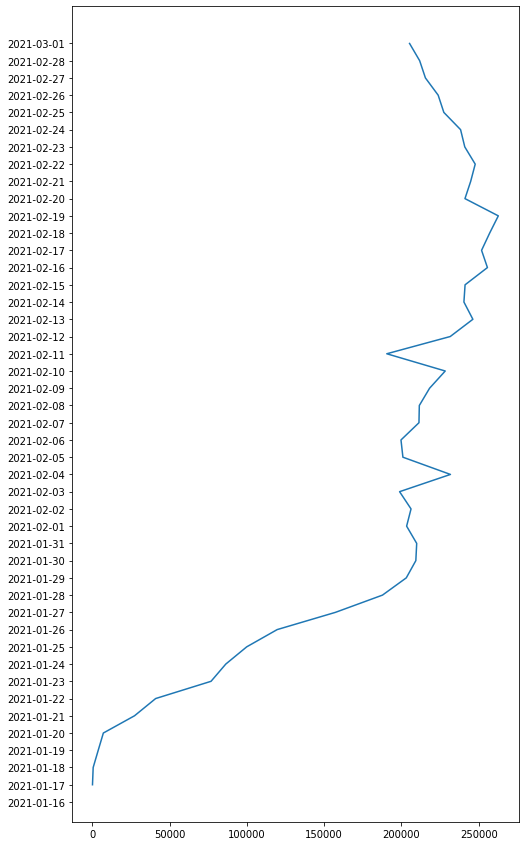

In [398]:
#Gráfico de vacinação diária no Brasil. Podemos perceber que há uma variação.
#Do dia 17/01 até o dia o dia 01/02 a quantidade de pessoas vacinadas por dia só aumentou, depois 
#ficou oscilando
br_vaccionations = country_vaccinations[country_vaccinations['country'] == 'Brazil']
plt.plot(br_vaccionations['daily_vaccinations'],br_vaccionations['date'])

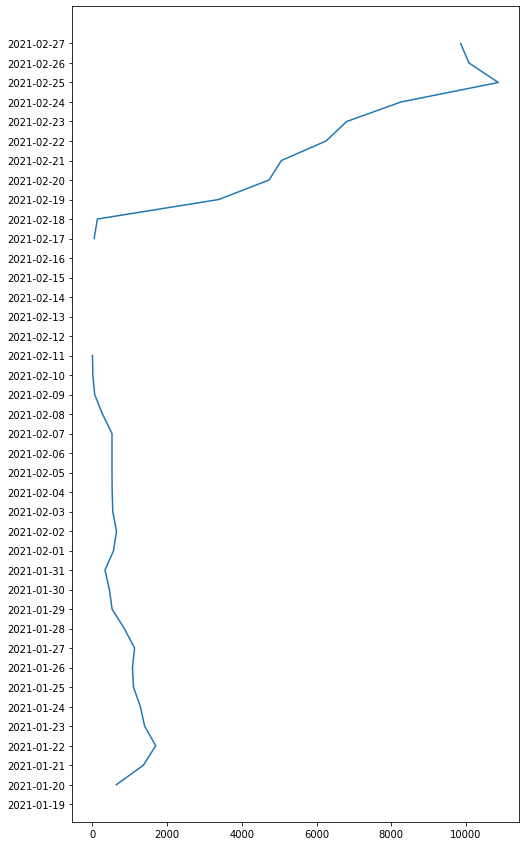

In [399]:
panama_vaccinations = country_vaccinations[country_vaccinations['country'] == 'Panama']
plt.plot(panama_vaccinations['daily_vaccinations'],panama_vaccinations['date'])

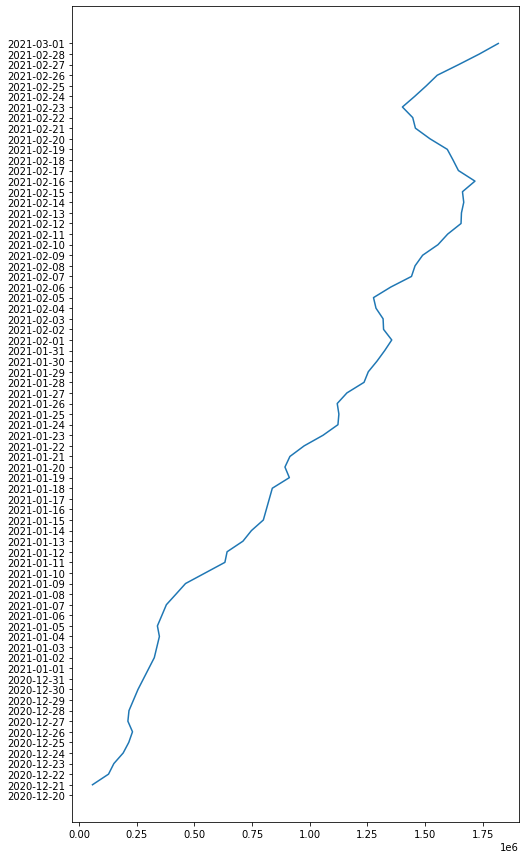

In [400]:
usa_vaccinations = country_vaccinations[country_vaccinations['country'] == 'United States']
plt.plot(usa_vaccinations['daily_vaccinations'],usa_vaccinations['date'])